<a href="https://colab.research.google.com/github/vngeno/E-COMMERCE-RECOMMENDATION-SYSTEM-/blob/Exploratory-Data-Analysis/EXPLORATORY_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Team Stars/Data/df_clean.csv', index_col=0)
df.head(2)

,id,name,brand,primarycategories,manufacturernumber,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_text,reviews_title,reviews_username
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG


In [ ]:
df.columns

Index(['id', 'name', 'brand', 'primarycategories', 'manufacturernumber',
       'reviews_dorecommend', 'reviews_numhelpful', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username'],
      dtype='object')

In [ ]:
df.head(2)

,id,name,brand,primarycategories,manufacturernumber,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_text,reviews_title,reviews_username
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,HL-002619,True,1.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG


In [ ]:
df.dtypes

id                      object
name                    object
brand                   object
primarycategories       object
manufacturernumber      object
reviews_dorecommend       bool
reviews_numhelpful     float64
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_username        object
dtype: object

In [ ]:
#The summary statistics are as follows
df.describe()

,reviews_numhelpful,reviews_rating
count,28332.000000,28332.000000
mean,1.030919,4.514048
std,11.709608,0.934957
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,1.000000,5.000000
max,621.000000,5.000000


In [ ]:
numcols = ['reviews_rating']

In [ ]:
#Descriptive Statistics
for i in numcols:
  print(i)
  print(f'mean:  {df[i].mean()}')
  print(f'median:  {df[i].sort_values(ascending=False).median()}')
  print(f'mode:  {df[i].mode()}')
  print(f'skewness:  {df[i].skew()}')
  print(f'The Standard Deviation: {df[i].std()}')
  print(f'The Variance: {df[i].var()}')
  print(f'Kurtosis:  {df[i].kurt()}, \n')

reviews_rating
mean:  4.514047719892701
median:  5.0
mode:  0    5
dtype: int64
skewness:  -2.3466656300403836
The Standard Deviation: 0.9349573506419196
The Variance: 0.8741452475193575
Kurtosis:  5.297527778621265, 



In [ ]:
df["reviews_rating"].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews_rating, dtype: int64

In [ ]:
df["reviews_numhelpful"].value_counts()

0.0      14896
1.0      12750
2.0        256
3.0         86
4.0         59
         ...  
42.0         1
36.0         1
20.0         1
31.0         1
103.0        1
Name: reviews_numhelpful, Length: 61, dtype: int64

In [ ]:
df["reviews_dorecommend"].value_counts()

True     27597
False      735
Name: reviews_dorecommend, dtype: int64

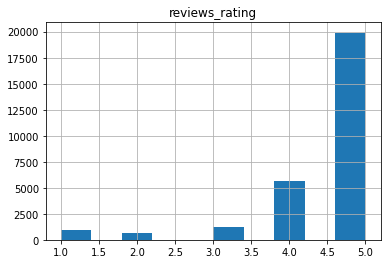

In [ ]:
for i in numcols:
  df.hist(i)

In [ ]:
df.columns

Index(['id', 'name', 'brand', 'primarycategories', 'manufacturernumber',
       'reviews_dorecommend', 'reviews_numhelpful', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username'],
      dtype='object')

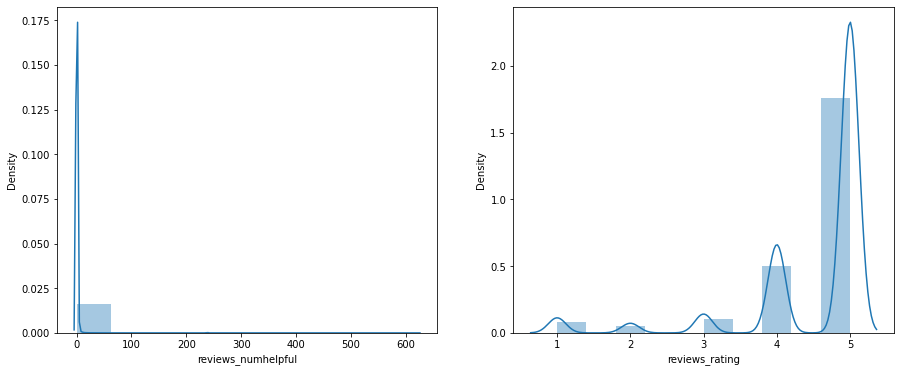

In [ ]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize= (15,6))

sns.distplot(df.reviews_numhelpful, ax=ax1, bins= 10)

sns.distplot(df.reviews_rating, ax=ax2, bins= 10)

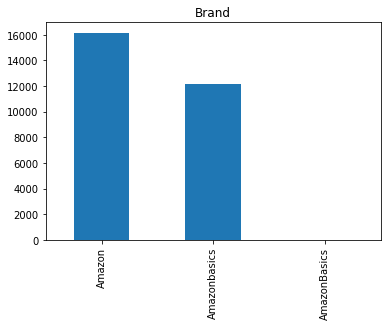

In [ ]:
#The most popular brand is Amazon followed by Amazonbasics
df['brand'].value_counts().plot(kind='bar')
plt.title('Brand');

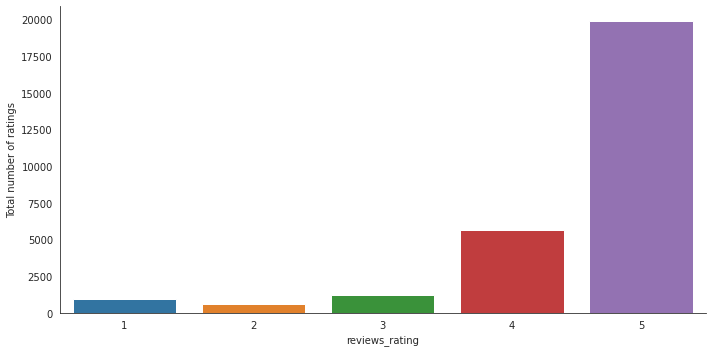

In [ ]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("reviews_rating", data=df, aspect=2.0, kind='count');
    g.set_ylabels("Total number of ratings") 

In [ ]:
# Count users based on ratings
for i in range(1,6):
  print('Number of users who rated {0} ratings = {1}'.format(i, df[df['reviews_rating'] == i].shape[0]))

Number of users who rated 1 ratings = 965
Number of users who rated 2 ratings = 616
Number of users who rated 3 ratings = 1206
Number of users who rated 4 ratings = 5648
Number of users who rated 5 ratings = 19897


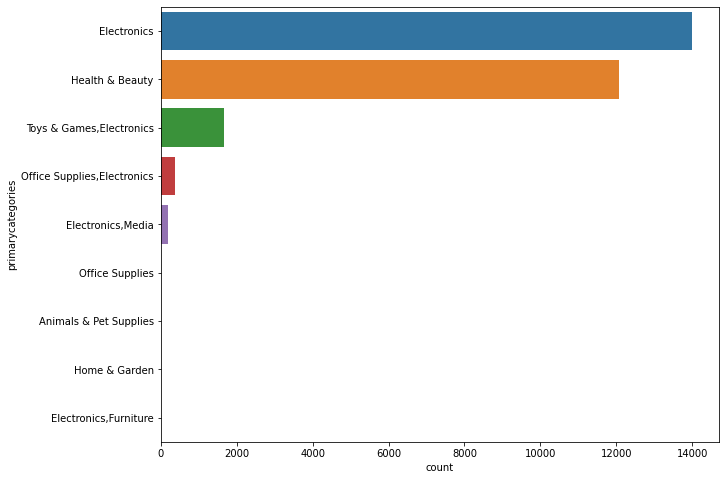

In [ ]:
# Visualisation of primaryCategories
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(y=df.primarycategories,order = df.primarycategories.value_counts().index)
plt.show()


In [ ]:
df.primarycategories.unique().value_count()

AttributeError: ignored

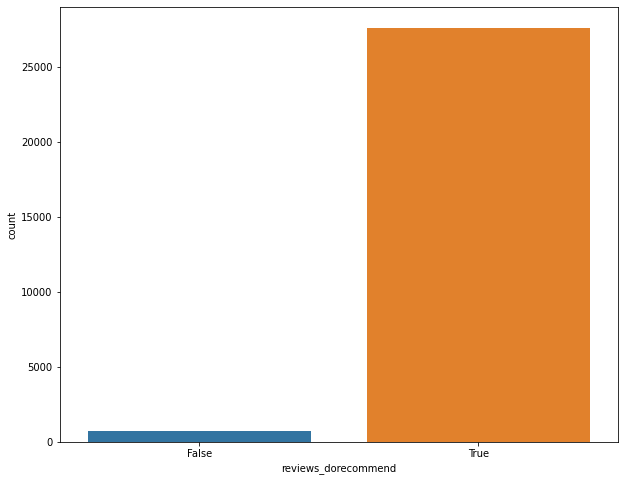

In [ ]:
ims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x="reviews_dorecommend", data=df)

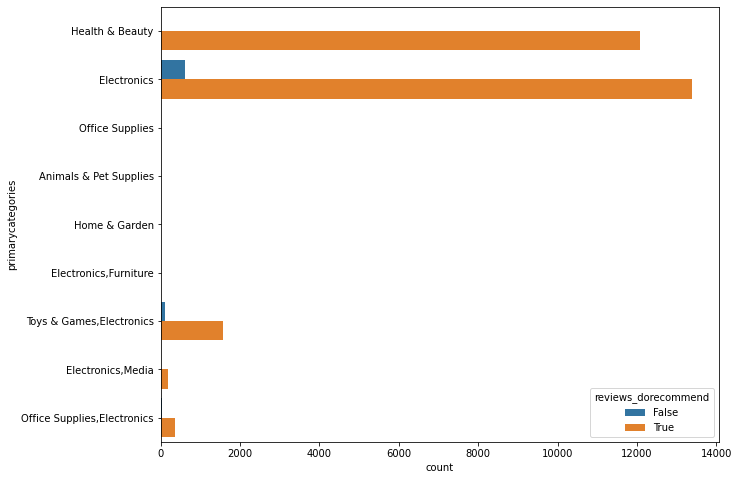

In [ ]:
dims = (10, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(y="primarycategories",hue="reviews_dorecommend", data=df)

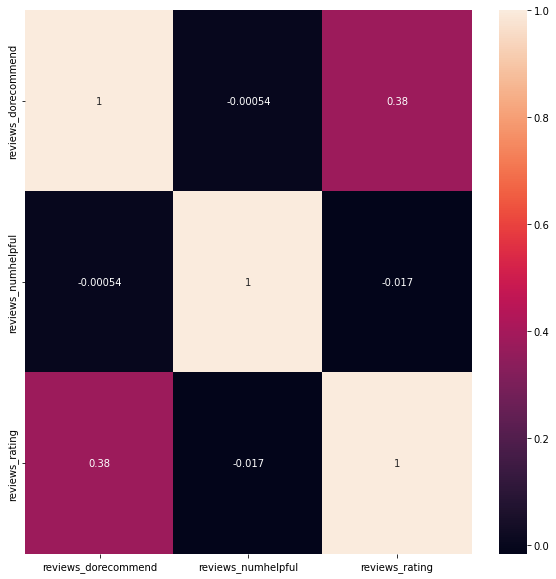

In [ ]:
#Bivariate Analysis
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

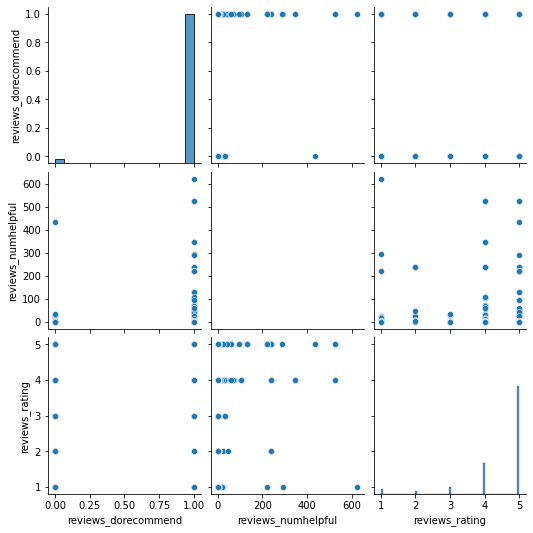

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
text = " ".join(cat.split()[10] for cat in df.primarycategories)


IndexError: ignored